In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [10]:
users_df = pd.read_csv(r"C:\Users\rocci\OneDrive\Desktop\Università\DL\DiagClassifier-main\DiagClassifier-main\users.txt", sep = "\t", dtype = str)
users_df

,ID,diag,sex,hand,age
0,00006,DYSGR,F,R,15
1,00007,DYSGR,M,R,15
2,00008,DYSGR,M,R,14
3,00011,DYSGR,M,R,8
4,00013,DYSGR,M,R,14
...,...,...,...,...,...
115,00187,0,M,R,15
116,00189,0,M,L,15
117,00190,0,F,R,15
118,00191,0,F,R,15


In [61]:
#users_df['age']=users_df['age'].astype(int)
users_df.loc[users_df['ID'] == '00050']

,ID,diag,sex,hand,age
22,00050,0,M,R,13


In [6]:
users_df['sex'].value_counts()
users_df['hand'].value_counts()
users_df['age'].value_counts()
users_df['diag'].value_counts()

0        63
DYSGR    57
Name: diag, dtype: int64

In [3]:
# Encoding function
def encodeCategorical(column, data):
    
    dataset = data
    
    valuesList = dataset[column].values
    valuesList = list(dict.fromkeys(valuesList))
    
    encoder = preprocessing.LabelEncoder()
    encoder.fit(valuesList)
    
    encoded = encoder.transform(dataset[column])
    for i in dataset.index:
        dataset.at[i, column] = encoded[i]
        
    return dataset

In [4]:
# Encoding diag, sex, hand features
users_df = encodeCategorical("diag", users_df)
users_df = encodeCategorical("sex", users_df)
users_df = encodeCategorical("hand", users_df)
users_df

,ID,diag,sex,hand,age
0,00006,1,0,0,15
1,00007,1,1,0,15
2,00008,1,1,0,14
3,00011,1,1,0,8
4,00013,1,1,0,14
...,...,...,...,...,...
115,00187,0,1,0,15
116,00189,0,1,1,15
117,00190,0,0,0,15
118,00191,0,0,0,15


In [9]:
users_df['diag'].value_counts()

0    63
1    57
Name: diag, dtype: int64

In [26]:
# Function to get user session by specifing row in user_df
def getSession(row) :
    user_id = users_df.loc[row,"ID"]

    session = pd.read_csv("C:/Users/rocci/OneDrive/Desktop/Università/DL/DiagClassifier-main/DiagClassifier-main/Sessions/u" + user_id + ".svc", sep = ' ', skiprows=1)
    session.columns = ['x', 'y', 'time', 'touch', 'azimuth', 'altitude', 'pressure', 'spazio'] 
    session.drop("spazio", axis = 1, inplace = True)

    return session

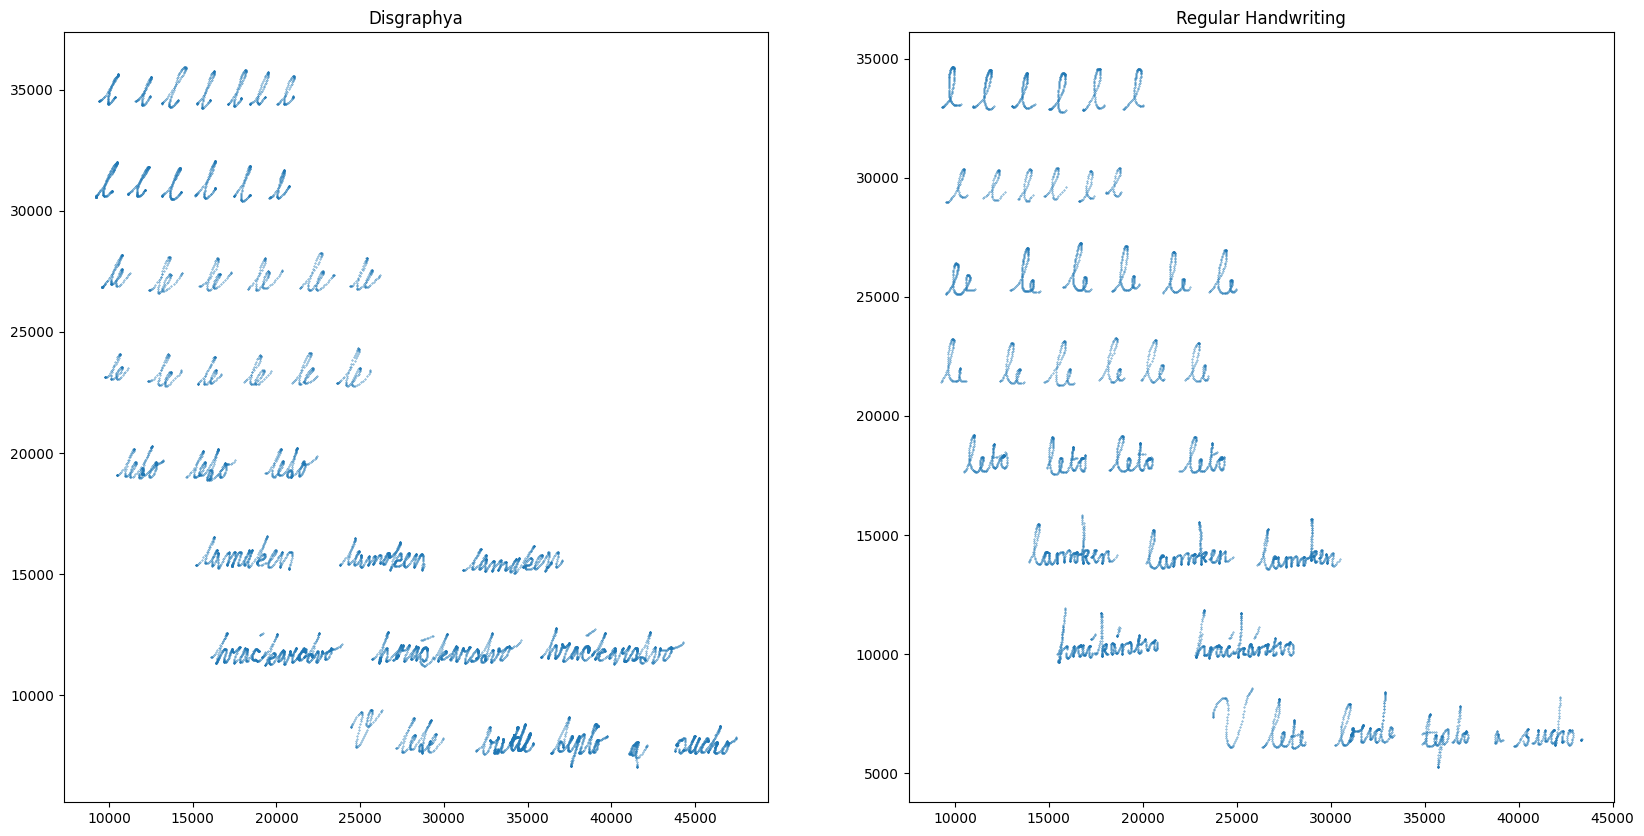

In [62]:
# Initializing plots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))

# Getting random session with disgraphya
row = 1
user_id = users_df.loc[row,"ID"]
session = pd.read_csv("C:/Users/rocci/OneDrive/Desktop/Università/DL/DiagClassifier-main/DiagClassifier-main/Sessions/u" + user_id + ".svc", sep = ' ', skiprows=1)
session.columns = ['x', 'y', 'time', 'touch', 'azimuth', 'altitude', 'pressure', 'spazio']
session.drop("spazio", axis = 1, inplace = True)
session.drop(session.index[session['touch'] == 0], inplace=True)  # Dropping data points where there's no pen's touch
# plotting the points
ax1.scatter(session['x'], session['y'],s=0.1)
ax1.set_title('Disgraphya')

# Getting random session without disgraphya
row = 118
user_id = users_df.loc[row,"ID"]
session = pd.read_csv("C:/Users/rocci/OneDrive/Desktop/Università/DL/DiagClassifier-main/DiagClassifier-main/Sessions/u00050.svc", sep = ' ', skiprows=1)
session.columns = ['x', 'y', 'time', 'touch', 'azimuth', 'altitude', 'pressure', 'spazio']
session.drop("spazio", axis = 1, inplace = True)
session.drop(session.index[session['touch'] == 0], inplace=True)  # Dropping data points where there's no pen's touch
# plotting the points
ax2.scatter(session['x'], session['y'],s=0.1)
ax2.set_title('Regular Handwriting')

# function to show the plot
plt.show()

In [24]:
#DATASET PER RICOSTRUIRE UN DISEGNO
getSession(1)

,x,y,time,touch,azimuth,altitude,pressure
0,9410,34548,733391065,1,1280,450,120
1,9410,34548,733391073,1,1280,450,153
2,9410,34548,733391080,1,1280,450,176
3,9410,34548,733391088,1,1280,450,186
4,9410,34548,733391095,1,1290,450,191
...,...,...,...,...,...,...,...
19937,47399,8173,733554243,1,1360,540,307
19938,47431,8198,733554251,1,1360,540,302
19939,47454,8221,733554258,1,1360,540,281
19940,47465,8241,733554266,1,1360,540,235


In [30]:
df = pd.read_csv(r'C:\Users\rocci\OneDrive\Desktop\Università\DL\DiagClassifierTransferLearning-main\DiagClassifierTransferLearning-main\updatedDataset.csv')

In [31]:
#DATASET CON FEATURE SUI DISEGNI
df.head()

,ID,diag,sex,hand,age,max_X,min_X,max_Y,min_Y,xMaxSegment,...,median_pressure,mean_altitude,var_altitude,median_altitude,mean_azimuth,var_azimuth,median_azimuth,duration,penLifts,intersectionsCount
0,6,1,0,0,15,56794,11888,39045,4646,8219,...,482.0,623.924548,623.924548,580.0,1420.354727,1420.354727,1380.0,132.896,73,1
1,7,1,1,0,15,47465,9054,36578,7019,5721,...,281.0,586.073112,586.073112,510.0,1362.700931,1362.700931,1300.0,163.208,62,21
2,8,1,1,0,14,48469,12428,36672,7252,6349,...,401.0,681.420902,681.420902,660.0,1220.450336,1220.450336,1180.0,106.014,49,5
3,11,1,1,0,8,49767,7062,36009,5641,9227,...,522.0,593.598292,593.598292,550.0,862.982325,862.982325,750.0,388.567,62,44
4,13,1,1,0,14,42992,11271,34611,4997,7471,...,210.0,573.814058,573.814058,530.0,891.518851,891.518851,810.0,190.817,43,20


In [1]:
import gym

In [2]:
env = gym.make('Taxi-v3')

In [7]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

